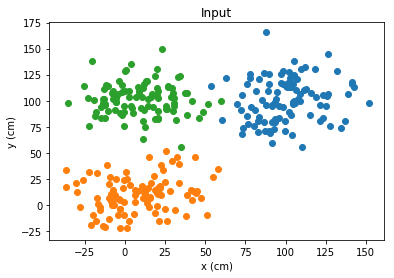

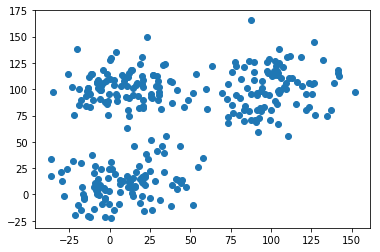

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.title('Input')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
mean1 = [100, 100]
mean2 = [10,10]
mean3 = [10,100]
cov = [[400,-2], [-2,400]] 
x1, y1 = np.random.multivariate_normal(mean1,cov, 100).T
x2,y2  = np.random.multivariate_normal(mean2,cov, 100).T
x3,y3  = np.random.multivariate_normal(mean3,cov, 100).T
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

def u(x1,x2):
    a=[]
    for i in range(0,len(x1)+len(x2)):
        if(i<len(x1)):
            a.append(x1[i])
        elif(len(x1)<=i):
            a.append(x2[i-len(x1)])
    return a

def line(a,b,c,x,y):
    return(a*x+b*y+c)

def pb(x,y,rx,ry):
    return( line( 2*(rx[1]-rx[0]) , 2*(ry[1]-ry[0]) , rx[0]**2 + ry[0]**2 - rx[1]**2 - ry[1]**2 , x , y ) )

x0=u(x1,x2)
x=u(x0,x3)
y0=u(y1,y2)
y=u(y0,y3)
plt.scatter(x,y)
plt.show()
z=x,y

from random import *

def ran(z):
    x=z[0]
    y=z[1]
    rx1=randrange(round(min(x), 0),round(max(x), 0))
    ry1=randrange(round(min(y), 0),round(max(y), 0))
    rx2=randrange(round(min(x), 0),round(max(x), 0))
    ry2=randrange(round(min(y), 0),round(max(y), 0))
    #rx3=randrange(round(min(x), 0),round(max(x), 0))
    #ry3=randrange(round(min(y), 0),round(max(y), 0))
    rx=rx1,rx2
    ry=ry1,ry2
    return(rx,ry)
rx=ran(z)[0]
ry=ran(z)[1]

In [13]:
def side(x,y,rx,ry):
    a=[]
    if (pb(x,y,rx,ry) * pb(rx[0],ry[0],rx,ry) > 0):
         a=rx[0],ry[0]  
    elif(pb(x,y,rx,ry) * pb(rx[1],ry[1],rx,ry) > 0):
         a=rx[1],ry[1]
    return a 

def div(x,y,rx,ry):
    a=[]
    b=[]
    for i in range(0,len(x)): 
        if(side(x[i],y[i],rx,ry) == (rx[0],ry[0]) ):
            a.append((x[i],y[i]))
        elif(side(x[i],y[i],rx,ry) == (rx[1],ry[1]) ):
            b.append((x[i],y[i]))
    return(a,b) 

def newcen(a):
    b=[]
    c=[]
    for i in range(0,len(a)):
        b.append(a[i][0])
        c.append(a[i][1])
    return(sum(b)/len(b),sum(c)/len(c))    

def xr(a):
    b=[]
    c=[]
    for i in range(0,len(a)):
        b.append(a[i][0])
        c.append(a[i][1])
    return(b,c)

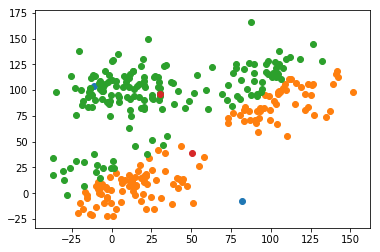

In [14]:
def shift(x,y,rx,ry):
    b=[]
    a=div(x,y,rx,ry)
    xn=newcen(a[0])[0],newcen(a[1])[0]
    yn=newcen(a[0])[1],newcen(a[1])[1]
    return xn,yn  
d=shift(x,y,rx,ry)

plt.scatter(rx,ry)
plt.scatter(xr(div(x,y,rx,ry)[0])[0],xr(div(x,y,rx,ry)[0])[1])
plt.scatter(xr(div(x,y,rx,ry)[1])[0],xr(div(x,y,rx,ry)[1])[1])
plt.scatter(d[0],d[1])
plt.show()

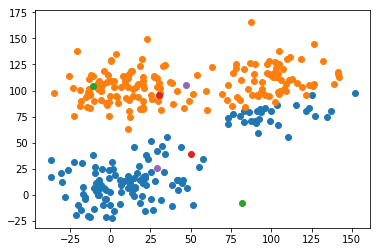

In [15]:
e=shift(x,y,d[0],d[1])
a1=div(x,y,d[0],d[1])[0]
b1=div(x,y,d[0],d[1])[1]

#"""""
plt.scatter(xr(a1)[0],xr(a1)[1])
plt.scatter(xr(b1)[0],xr(b1)[1])
plt.scatter(rx,ry)
plt.scatter(d[0],d[1])
plt.scatter(e[0],e[1])
plt.show() #"""""

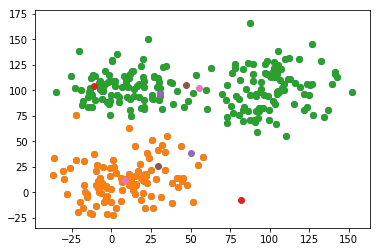

In [16]:
e1=shift(x,y,e[0],e[1])
a2=div(x,y,e[0],e[1])[0]
b2=div(x,y,e[0],e[1])[1]

#"""""
plt.scatter(xr(a2)[0],xr(a2)[1])
plt.scatter(xr(b2)[0],xr(b2)[1])
plt.scatter(d[0],d[1])
plt.scatter(e[0],e[1])
plt.scatter(e1[0],e1[1])
plt.show() #"""""